# 📚 Fundamentos Matemáticos da Computação Quântica

Bem-vindo! Este notebook foi criado para ajudá-lo a entender os **conceitos matemáticos básicos** necessários para trabalhar com computação quântica.

## 🎯 O que você vai aprender:

1. **Estados quânticos** - Como representar qubits matematicamente
2. **Portas quânticas** - Operações que transformam estados quânticos
3. **Superposição** - O "poder" dos computadores quânticos
4. **Visualizações** - Esfera de Bloch e outras representações visuais

## 💡 Para quem é este notebook?

Se você conhece:
- ✅ Álgebra linear básica (vetores e matrizes)
- ✅ Números complexos (pelo menos saber que existem 😊)
- ✅ Python básico

Então você está pronto para começar! Não se preocupe se alguns conceitos parecerem estranhos no início - isso é normal em computação quântica.

---

**Dica**: Execute cada célula na ordem para acompanhar os exemplos interativos!

In [2]:
# Importando as bibliotecas necessárias
# Não se preocupe se não entender todas agora - vamos usá-las ao longo do notebook

import numpy as np                      # Para operações com matrizes e vetores
import sympy as sp                      # Para matemática simbólica (fórmulas bonitas)
from sympy import Matrix, symbols       # Para criar matrizes e símbolos matemáticos
from IPython.display import Markdown    # Para exibir fórmulas formatadas
from qiskit.quantum_info import Statevector  # Para trabalhar com estados quânticos
from matplotlib import pyplot as plt    # Para criar gráficos
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere  # Visualizações quânticas


## 🔬 Estados Quânticos Básicos

Na computação clássica, trabalhamos com **bits** que podem ser 0 ou 1.

Na computação quântica, trabalhamos com **qubits** que podem estar em:
- **Estado |0⟩** (lê-se "ket zero") - equivalente ao bit clássico 0
- **Estado |1⟩** (lê-se "ket um") - equivalente ao bit clássico 1
- **Superposição de |0⟩ e |1⟩** - aqui está a mágica! O qubit pode estar em "ambos" estados simultaneamente

### 📌 Notação matemática:

Representamos esses estados como **vetores coluna**. em geral:

$|\psi⟩ = \begin{bmatrix} \text{amplitude para estado } \alpha  \\ \text{amplitude para estado } \beta \end{bmatrix}$ 

Essa amplitude pode variar de $-1$ a $1$ em números reais ou é um número complexo cujo módulo (valor absoluto) é menor ou igual a 1.

Assim:

- Estado |0⟩ = $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ 
    - **Primeira posição (1)**: Amplitude para o estado |0⟩
    - **Segunda posição (0)**: Amplitude para o estado |1⟩
    - ➡️ Interpretação: 100% de probabilidade de medir 0, 0% de probabilidade de medir 1

- Estado |1⟩ = $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$
    - **Primeira posição (0)**: Amplitude para o estado |0⟩
    - **Segunda posição (1)**: Amplitude para o estado |1⟩
    - ➡️ Interpretação: 0% de probabilidade de medir 0, 100% de probabilidade de medir 1

**Regra geral**: Para qualquer qubit $|\psi⟩ = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$:
- O valor **$\alpha$** (primeira linha) representa a amplitude do estado |0⟩
- O valor **$\beta$** (segunda linha) representa a amplitude do estado |1⟩
- As probabilidades são: P(0) = |$\alpha$|² e P(1) = |$\beta$|²
- Sempre vale: |$\alpha$|² + |$\beta$|² = 1 (normalização)

**Por que vetores?** Porque podemos aplicar transformações matemáticas (matrizes) neles, e isso é exatamente o que as portas quânticas naturalmente fazem!

In [3]:
# Vamos criar esses estados básicos usando SymPy (biblioteca de matemática simbólica)
# Isso nos permite trabalhar com fórmulas matemáticas de forma elegante

# Estado |0⟩ - primeiro número é 1, segundo é 0
ket_0 = Matrix([[1], 
                [0]])

# Estado |1⟩ - primeiro número é 0, segundo é 1
ket_1 = Matrix([[0], 
                [1]])

# Exibir de forma bonita com LaTeX (notação matemática profissional)
display(Markdown(f"$ \\ket{{0}} = {sp.latex(ket_0)} $"))
display(Markdown(f"$ \\ket{{1}} = {sp.latex(ket_1)} $"))

print("\n✅ Estados básicos criados com sucesso!")

$ \ket{0} = \left[\begin{matrix}1\\0\end{matrix}\right] $

$ \ket{1} = \left[\begin{matrix}0\\1\end{matrix}\right] $


✅ Estados básicos criados com sucesso!


In [4]:
# Agora vamos criar os MESMOS estados usando NumPy (só para fins de comparação de bibliotecas)
# NumPy é mais eficiente para cálculos numéricos (com números reais)

# Estado |0⟩ usando NumPy
q_zero = np.array([
    [1],   # Probabilidade 100% de medir 0
    [0]    # Probabilidade 0% de medir 1
])

# Estado |1⟩ usando NumPy
q_one = np.array([
    [0],   # Probabilidade 0% de medir 0
    [1]    # Probabilidade 100% de medir 1
])

print("=== Estado |0⟩ ===")
print(q_zero)
print("\n=== Estado |1⟩ ===")
print(q_one)

print("\n💡 Dica: Esses vetores representam a 'probabilidade' de medir cada resultado!")


=== Estado |0⟩ ===
[[1]
 [0]]

=== Estado |1⟩ ===
[[0]
 [1]]

💡 Dica: Esses vetores representam a 'probabilidade' de medir cada resultado!


## 🌟 Superposição: o coração da Computação Quântica

Aqui está onde a mágica acontece! Um qubit pode estar em uma **combinação** dos estados |0⟩ e |1⟩:

$$|ψ⟩ = 𝛼|0⟩ + 𝛽|1⟩$$

Onde:
- **|ψ⟩** (lê-se "ket psi") é o estado do qubit
- **𝛼** (alpha) e **𝛽** (beta) são **números complexos** chamados de **amplitudes**
- **Regra de ouro**: $|𝛼|² + |𝛽|²= 1$ (aqui também essas probabilidades precisam somar 100%!)

### 🎲 Como interpretar as amplitudes:

- $|𝛼|²$ = probabilidade de medir **0**
- $|𝛽|²$ = probabilidade de medir **1**

### 📊 Exemplo visual:

Se $𝛼 = \frac{1}{\sqrt{2}}$ e $𝛽 = \frac{1}{\sqrt{2}}$? 

"Montando" a combinação dos estados |0⟩ e |1⟩, ficará assim:

$$|ψ⟩ = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$$

Se quiser, pra ficar mais claro, podemos substituir os kets pelos seus vetores, até para ficar mais intuitivo e você sempre imaginar que por trás desses kets, existem, na verdade, vetores:

$$|ψ⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

Assim, não precisamos sempre usar vetores, mas é bom saber que eles estão lá por trás.

Agora, calculando as probabilidades:

- Probabilidade de medir 0: $\left(\frac{1}{\sqrt{2}}\right)² = \frac{1}{2} = 0.50 = 50\%$
- Probabilidade de medir 1: $\left(\frac{1}{\sqrt{2}}\right)² = \frac{1}{2} = 0.50 = 50\%$

**Em vetores:**

$$|ψ⟩ = 𝛼 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 𝛽 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 𝛼 \\ 𝛽 \end{bmatrix}$$

$$|ψ⟩ = 𝛼|0⟩ + 𝛽|1⟩$$

Simples assim! O primeiro número é a amplitude para |0⟩, o segundo para |1⟩.

In [7]:
# Vamos criar um estado genérico em superposição!
# Usamos símbolos 𝛼 (alpha) e 𝛽 (beta) para representar valores desconhecidos

alpha, beta = symbols('alpha beta', complex=True)   # Definindo 𝛼 e 𝛽 como números complexos
psi = alpha * ket_0 + beta * ket_1                  # Estado genérico em superposição

print("Estado quântico genérico criado:")

display(Markdown(f"$ \\ket{{\\psi}} = {sp.latex(psi)} $"))

print("\n💡 Isso significa:")
print("   - Com probabilidade |α|², medimos 0")
print("   - Com probabilidade |β|², medimos 1")
print("   - Antes da medição, o qubit está em AMBOS os estados!")


Estado quântico genérico criado:


$ \ket{\psi} = \left[\begin{matrix}\alpha\\\beta\end{matrix}\right] $


💡 Isso significa:
   - Com probabilidade |α|², medimos 0
   - Com probabilidade |β|², medimos 1
   - Antes da medição, o qubit está em AMBOS os estados!


## 🌀 E o que é esse termo "superposição"?

Superposição é o fenômeno quântico onde um qubit pode existir em múltiplos estados ao mesmo tempo. Diferente dos bits clássicos que são ou 0 ou 1, um qubit em superposição pode ser uma combinação de ambos os estados. 

> *Como assim? Eu estou acostumado a pensar que algo é 0 ou 1, não ambos ao mesmo tempo!* 🤔

Imagine uma moeda girando no ar 🪙 (esse é um comparativo clássico da literatura!). Enquanto está girando, ela não é nem cara nem coroa - está em um estado de superposição de ambos os lados. Só quando a moeda cai e você olha para ela 👀 é que ela "decide" ser cara ou coroa. Então, olhar para a moeda é como medir um qubit: você força ele a escolher um estado específico (0 ou 1), fazendo-o parar de girar.

Obviamente, se você for teimoso, vai dizer que os dois não são cara e coroa ao mesmo tempo, pois se você usar uma supercâmera de altíssima velocidade 📹, verá que a moeda está em um estado definido a cada instante. Em câmera super lenta, você verá que a moeda ou está em cara, ou em coroa. OK, teimoso, você está certo! Porém, entretanto, todavia...

No mundo quântico ⚛️, se essa moeda existisse - vamos chamar de moeda quântica 🪙✨ - ele seria cara e coroa ao mesmo tempo. Somente quando você a observasse é que poderia saber se é cara ou coroa. Na visualização, o movimento de giro é destruído ao ser observado. A moeda cai e para. Você perdeu a informação do movimento (superposição) e ficou apenas com o resultado estático (0 ou 1), e só a partir daí você sabe o resultado final. Estranho não é? Bem-vindo ao mundo quântico! 🎭

> ⚡ O que acontece: 
> O qubit (o objeto físico, como um elétron ou átomo) geralmente não é destruído (a menos que seja um fóton sendo absorvido por um detector). O que é "destruído" irremediavelmente é a informação da superposição (a parte quântica, o giro). O qubit continua lá, mas agora ele é apenas um bit clássico chato (está parado em cara ou coroa)

Entender isso (e aceitar) é crucial para compreender como os computadores quânticos funcionam e por que eles são tão poderosos para certas tarefas. Daqui para frente, sempre que falarmos de qubits em superposição, lembre-se da moeda quântica girando no ar!

Em [03-mais-sobre-Hadamard.md](03-mais-sobre-Hadamard.md) existe um experimento físico feito com fótons 💡 que ilustra muito bem esse conceito de superposição e medição quântica. Recomendo fortemente a leitura para aprofundar sua compreensão, caso estejas curioso! Somente me convenci intuitivamente disso após ler aquele experimento.

> 📊 O que acontece: 
> quando aplicamos uma porta Hadamard (veremos depois) e colocamos o qubit em um estado de superposição (como o estado $|+\rangle$), ele passa a ter 50% de chance de ser medido como 0 e 50% de chance de ser medido como 1. A medição 'colapsa' (faz parar) essa superposição em um dos estados possíveis."

Daí sempre precisamos realizar múltiplas medições para termos uma boa ideia das probabilidades reais envolvidas. É como jogar a moeda quântica 1024 vezes 🎲 - chamamos de 1024 shots - para ver quantas vezes ela cai em cara ou coroa! Uma hora pode ser 30% de cara, outra hora 70%. Em outro momento pode ser 33% de cara. Mas se você jogar 1024 vezes, verá que a média se aproxima dos 50% esperados. Você consegue entender que o fim do cálculo se baseia, na verdade, em probabilidades estatísticas, certo? Não é como somar 1 + 1 = 2, onde o resultado é sempre o mesmo. Aqui, o resultado pode variar a cada experimento, mas a média de muitos experimentos converge para o valor esperado. 

> 📈 Observação: 
> É padrão realizar, por exemplo, 1024 shots para construir um histograma de probabilidades e ver qual é a resposta mais provável.

Claro que em um computador clássico 💻 fazer cálculo (1 + 1 = 2) dessa forma demoraria muito, e seria coisa de louco calcular probabilidades estatísticas para tudo. Porém, você vai ver mais a frente, que existem certos cálculos que um computador clássico não consegue fazer de forma eficiente, pois se conseguisse, não haveria necessidade de um outro tipo de computador, certo? E é aí que entra o computador quântico 🖥️⚛️. Ele não precisa 'calcular' essas probabilidades uma a uma; ele manipula as ondas de probabilidade (amplitudes) usando superposição, entrelaçamento e interferência para que, no final, a resposta correta tenha a maior chance de ser medida. Mas isso é assunto para os próximos notebooks!

> 💾 O que acontece: 
> É explicado que para simular um sistema quântico de $n$ qubits, um computador clássico precisa armazenar $2^n$ números complexos (as amplitudes). Isso cresce exponencialmente. Com apenas 64 qubits, seriam necessários cerca de 18 quintilhões de números complexos, o que excede a capacidade de armazenamento atual para um computador clássico (este sofre para calcular essas amplitudes)!

Assim, quando você ouvir dizer que os cálculos realizados em um computador clássico são determinísticos (a gente sabe onde vai dar o resultado se fizermos "na mão"), enquanto os cálculos em um computador quântico são probabilísticos (é provável que dê 50% para...), agora você entenderá o porquê!

**✨ A superposição não é ser A e B. É ter a potencialidade de ser A ou B, com uma probabilidade que nós podemos controlar.**

---

## ⚙️ Portas Quânticas: Transformando Estados

Portas quânticas são **transformações** que aplicamos aos qubits. Matematicamente, são **matrizes** que multiplicamos pelos vetores de estado.

Da mesma forma que em computação clássica temos portas lógicas (AND, OR, NOT) que manipulam bits, em computação quântica temos portas quânticas que manipulam qubits. 

**Analogia:** Se um estado quântico é como uma formiga em cima de uma bola (Esfera de Bloch), uma porta quântica é como uma rotação que move a formiga para uma nova posição na bola.

### 🔄 Principais Portas Quânticas:

1. **Porta X (NOT quântico)** - Inverte |0⟩ ↔ |1⟩ (como o NOT da computação clássica)
2. **Porta H (Hadamard)** - Cria superposição (a porta mais importante!)
3. **Portas de Fase (Z, S, T)** - Modificam a fase sem mudar probabilidades

Vamos explorar cada uma delas!

> ⚠️ **Importante**:
> Vamos trabalhar com kets ao representar os estados quânticos, como |0⟩ e |1⟩, para manter a notação padrão da computação quântica. Lembre-se que por trás desses kets, existem vetores coluna que representam os estados matematicamente, só isso!

---

### 🚪 Porta X (NOT Quântico)

É a versão quântica do NOT clássico. Funciona assim:
- Se o qubit está em |0⟩ → vira |1⟩
- Se o qubit está em |1⟩ → vira |0⟩

Se fossemos usar vetores, seria:
- Se o qubit está em $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ → vira $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$
- Se o qubit está em $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ → vira $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$

**Matriz da Porta X:**

$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

**Como funciona:**

A função é simbolizada como X|ψ⟩, onde |ψ⟩ é o estado do qubit. Assim, é como se:

- em $X$ você substitui o $X$ pela matriz da porta X que é $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$
- e o $|0⟩$ pelo vetor correspondente a |0⟩, que é $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$.

Então, juntando $X$ e $|0⟩$, temos $X|0⟩$:

$$X|0⟩ = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

Daqui é só continuar com o cálculo sobre a multiplicação de matrizes para ver o resultado final:

$$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

E você percebe com que $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ se parece? Sim! É o vetor correspondente a |1⟩. Então, concluímos que:

$$X|0⟩ = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1⟩$$

---

E para $X|1⟩$?

$$X|1⟩ = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0⟩$$

**Dica:** Multiplicação de matrizes é só "linha × coluna e somar"!

In [ ]:
# Vamos testar a porta X na prática com Python!

# Definir a matriz da porta X
X = Matrix([[0, 1],
            [1, 0]])

print("🔄 Aplicando a Porta X...\n")

# Aplicar X ao estado |0⟩
result_0 = X * ket_0        # ket_0 é o estado |0⟩ com o vetor definido no código lá atrás, lembra?
print("Teste 1: X|0⟩ deve dar |1⟩")
display(Markdown(f"$ X \\ket{{0}} = {sp.latex(result_0)} $ ✅"))

# Aplicar X ao estado |1⟩
result_1 = X * ket_1
print("\nTeste 2: X|1⟩ deve dar |0⟩")
display(Markdown(f"$ X \\ket{{1}} = {sp.latex(result_1)} $ ✅"))

print("\n💡 A porta X realmente inverte os estados, como esperado!")

🔄 Aplicando a Porta X...

Teste 1: X|0⟩ deve dar |1⟩


$ X \ket{0} = \left[\begin{matrix}0\\1\end{matrix}\right] $ ✅


Teste 2: X|1⟩ deve dar |0⟩


$ X \ket{1} = \left[\begin{matrix}1\\0\end{matrix}\right] $ ✅


💡 A porta X realmente inverte os estados, como esperado!


In [ ]:
# Agora vamos definir a porta X usando NumPy (outra maneira de fazer a mesma coisa)

gate_x = np.array([
    [0, 1],  # Primeira linha da matriz
    [1, 0]   # Segunda linha da matriz
])

print("Porta X definida com NumPy:")
print(gate_x)
print("\n✅ Pronta para usar em cálculos numéricos!")


Porta X definida com NumPy:
[[0 1]
 [1 0]]

✅ Pronta para usar em cálculos numéricos!


In [51]:
# Vamos aplicar a porta X ao estado |0⟩ e ver o resultado numérico

print("=== Aplicando Porta X ao estado |0⟩ ===\n")

# Multiplicação de matriz por vetor: np.dot(matriz, vetor)
novo_estado = np.dot(gate_x, q_zero)

print("Estado inicial |0⟩:")
print(q_zero)

print("\nApós aplicar a porta X:")
print(novo_estado)

print("\n✅ Esperávamos |1⟩ (vetor [0, 1]), e foi isso que obtivemos!")
print("💡 A porta X funcionou como um 'interruptor' que inverte o qubit!")


=== Aplicando Porta X ao estado |0⟩ ===

Estado inicial |0⟩:
[[1]
 [0]]

Após aplicar a porta X:
[[0]
 [1]]

✅ Esperávamos |1⟩ (vetor [0, 1]), e foi isso que obtivemos!
💡 A porta X funcionou como um 'interruptor' que inverte o qubit!


---

### Porta H (Hadamard)

A porta H, ou porta Hadamard, é representada pela seguinte matriz:

$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

Como funciona:

---

Vamos aplicar a porta H ao estado |0⟩:

$$H|0⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \cdot 1 + 1 \cdot 0 \\ 1 \cdot 1 + (-1) \cdot 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

Agora, por que o resultado $\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ vai ser igual a $\frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$?

Isso ocorre porque o vetor $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ pode ser expresso como a soma dos vetores base:

$$\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |0⟩ + |1⟩$$

Portanto:

$$\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} (|0⟩ + |1⟩) = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$$

Esta expressão demonstra o efeito fundamental da porta Hadamard: ela transforma um estado definido (|0⟩) em uma **superposição** com amplitudes iguais. Os coeficientes $\frac{1}{\sqrt{2}} \approx 0.707$ garantem a normalização, ou seja, $\left(\frac{1}{\sqrt{2}}\right)^2 + \left(\frac{1}{\sqrt{2}}\right)^2 = 1$.

---

Vamos agora aplicar a porta H ao estado |1⟩:

$$H|1⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \cdot 0 + 1 \cdot 1 \\ 1 \cdot 0 + (-1) \cdot 1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \frac{1}{\sqrt{2}}|0⟩ - \frac{1}{\sqrt{2}}|1⟩$$

Note que a porta Hadamard é **auto-adjunta** (igual à sua transposta conjugada), propriedade fundamental das portas quânticas reversíveis.

In [ ]:
# Exemplo de aplicação da porta H (Hadamard)

# Definir a porta H
H = (1 / sp.sqrt(2)) * Matrix([[1, 1],
                               [1, -1]])

# Aplicar a porta H ao estado |0⟩
result_h0 = H * ket_0

# Aplicar a porta H ao estado |1⟩
result_h1 = H * ket_1

# Explicar o resultado utilizando Markdown para formatação bonita (perfumaria)

print("=== Aplicando Porta H (Hadamard) ===\n")
print("A porta H cria superposição dos estados |0⟩ e |1⟩.\n")
display(Markdown(f"$ H \\ket{{0}} = {sp.latex(H)} \\cdot {sp.latex(ket_0)} = {sp.latex(result_h0)} $"))

print("\nResultado detalhado:")
display(Markdown(f"$ {sp.latex(result_h0)} = \\frac{{1}}{{\\sqrt{{2}}}} \\ket{{0}} + \\frac{{1}}{{\\sqrt{{2}}}} \\ket{{1}} $"))

print("\nAgora aplicando H ao estado |1⟩:\n")
display(Markdown(f"$ H \\ket{{1}} = {sp.latex(H)} \\cdot {sp.latex(ket_1)} = {sp.latex(result_h1)} $"))

print("\nResultado detalhado:")
display(Markdown(f"$ {sp.latex(result_h1)} = \\frac{{1}}{{\\sqrt{{2}}}} \\ket{{0}} - \\frac{{1}}{{\\sqrt{{2}}}} \\ket{{1}} $"))

=== Aplicando Porta H (Hadamard) ===

A porta H cria superposição dos estados |0⟩ e |1⟩.



$ H \ket{0} = \left[\begin{matrix}\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\\frac{\sqrt{2}}{2} & - \frac{\sqrt{2}}{2}\end{matrix}\right] \cdot \left[\begin{matrix}1\\0\end{matrix}\right] = \left[\begin{matrix}\frac{\sqrt{2}}{2}\\\frac{\sqrt{2}}{2}\end{matrix}\right] $


Resultado detalhado:


$ \left[\begin{matrix}\frac{\sqrt{2}}{2}\\\frac{\sqrt{2}}{2}\end{matrix}\right] = \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} $


Agora aplicando H ao estado |1⟩:



$ H \ket{1} = \left[\begin{matrix}\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\\frac{\sqrt{2}}{2} & - \frac{\sqrt{2}}{2}\end{matrix}\right] \cdot \left[\begin{matrix}0\\1\end{matrix}\right] = \left[\begin{matrix}\frac{\sqrt{2}}{2}\\- \frac{\sqrt{2}}{2}\end{matrix}\right] $


Resultado detalhado:


$ \left[\begin{matrix}\frac{\sqrt{2}}{2}\\- \frac{\sqrt{2}}{2}\end{matrix}\right] = \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} $

In [ ]:
# Outra maneira de definir a porta H usando NumPy (faz a mesma coisa que o código anterior)
# Porta H (Hadamard): Cria superposição
# Matriz: (1/√2) * [[1, 1], [1, -1]]
gate_h = (1 / np.sqrt(2)) * np.array([
    [1, 1],
    [1, -1]
])

# APLICANDO A PORTA HADAMARD em |0>
# Operação: H * |0> = Superposição
estado_superposicao = np.dot(gate_h, q_zero)

print("\n--- Após aplicar a Porta Hadamard (H) ---")
print(f"Estado de Superposição:\n{estado_superposicao}")
# Note que os valores são aprox 0.707 (que é 1/raiz(2))



--- Após aplicar a Porta Hadamard (H) ---
Estado de Superposição:
[[0.70710678]
 [0.70710678]]


**A Superposição**

Quando aplicamos a gate_h, o resultado foi: 

$$\begin{bmatrix} 0.707... \\ 0.707... \end{bmatrix}$$

Isso significa que o qubit não é nem 0 e nem 1. Ele contém "informação" de ambos. Matematicamente, ele é:

$$|\psi\rangle = 0.707|0\rangle + 0.707|1\rangle$$

## 🌀 Fase Quântica

Um dos conceitos mais importantes (e sutis) da mecânica quântica é a **fase quântica**. Enquanto as probabilidades $|𝛼|²$ e $|𝛽|²$ determinam os resultados da medição, a **fase relativa** entre as amplitudes é crucial para fenômenos de interferência.

### Fase Global vs. Fase Relativa

Números complexos podem ser escritos na forma polar:

$$𝛼 = |𝛼| e^{i\phi}$$

onde $\phi$ é a fase do número complexo.

- **Fase Global**: Se multiplicarmos todo o estado por $e^{i\theta}$, isso não tem efeito observável:
  $$e^{i\theta}(𝛼|0⟩ + 𝛽|1⟩) \equiv 𝛼|0⟩ + 𝛽|1⟩$$

- **Fase Relativa**: A diferença de fase entre $𝛼$ e $𝛽$ **é observável** através de interferência (vamos ver esse assunto depois):
  $$\frac{1}{\sqrt{2}}(|0⟩ + |1⟩) \neq \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$$

### Estados importantes com diferentes fases

- $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$ — fase relativa 0°
- $|-⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$ — fase relativa 180°
- $|i+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + i|1⟩)$ — fase relativa 90°
- $|i-⟩ = \frac{1}{\sqrt{2}}(|0⟩ - i|1⟩)$ — fase relativa 270°

### Portas que modificam fase

- **Porta Z**: Adiciona fase de 180° ao estado |1⟩
  $$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

- **Porta S**: Adiciona fase de 90° ao estado |1⟩
  $$S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$$

- **Porta T**: Adiciona fase de 45° ao estado |1⟩
  $$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}$$

In [38]:
# Importações para visualização da esfera de Bloch
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Definir as portas de fase
Z = Matrix([[1, 0],
            [0, -1]])

S = Matrix([[1, 0],
            [0, sp.I]])

T = Matrix([[1, 0],
            [0, sp.exp(sp.I * sp.pi / 4)]])

display(Markdown(f"$ Z = {sp.latex(Z)} $"))
display(Markdown(f"$ S = {sp.latex(S)} $"))
display(Markdown(f"$ T = {sp.latex(T)} $"))

$ Z = \left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right] $

$ S = \left[\begin{matrix}1 & 0\\0 & i\end{matrix}\right] $

$ T = \left[\begin{matrix}1 & 0\\0 & e^{\frac{i \pi}{4}}\end{matrix}\right] $

Se você ainda não entendeu completamente o conceito de fase quântica, talvez fica melhor de visualizar na Esfera de Bloch, que veremos no próximo tópico! Depois volte para cá para reforçar o entendimento.

### Visualização na Esfera de Bloch

A esfera de Bloch é uma representação geométrica de um qubit onde:
- **Polo Norte** = |0⟩
- **Polo Sul** = |1⟩
- **Eixo +X** = |+⟩ (fase 0°)
- **Eixo -X** = |-⟩ (fase 180°)
- **Eixo +Y** = |i+⟩ (fase 90°)
- **Eixo -Y** = |i-⟩ (fase 270°)

Vamos visualizar estados com diferentes fases:

Estado |+⟩ (Fase 0°) - Eixo +X:


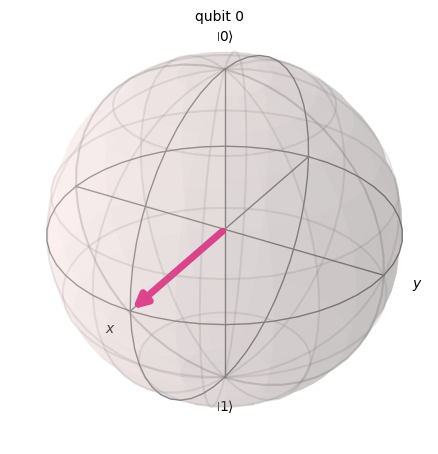


Estado |-⟩ (Fase 180°) - Eixo -X:


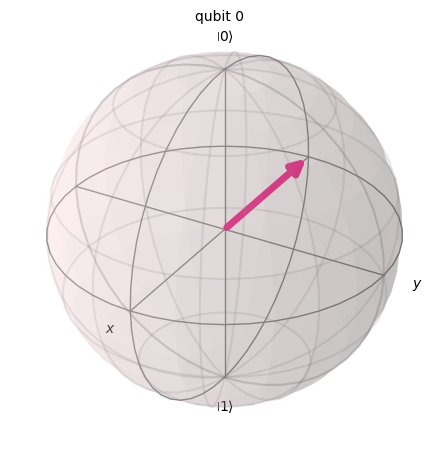


Estado |i+⟩ (Fase 90°) - Eixo +Y:


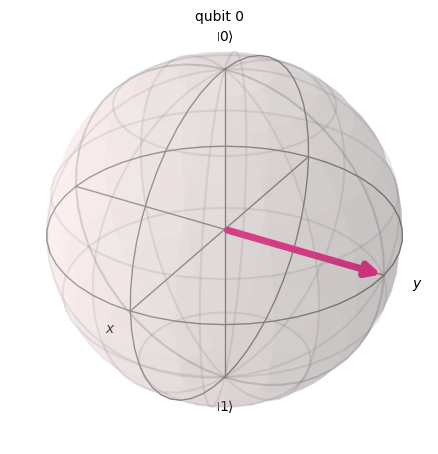


Estado |i-⟩ (Fase 270°) - Eixo -Y:


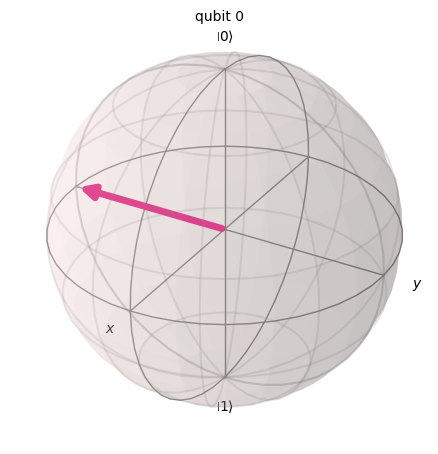


Observe como todos os estados estão no equador da esfera de Bloch
(igual probabilidade de medir 0 ou 1), mas em direções diferentes.


In [ ]:
# Statevector do Qiskit serve para visualização. 
# Vai ajudar a montrar a esfera de Bloch.
# Ele aceita listas com os coeficientes dos estados |0⟩ e |1⟩, neste caso
# aqueles alfa e beta que vimos antes.

# Aqui, alfa e beta são ambos 1/√2 para o estado |+⟩

# Estado |+⟩ = H|0⟩ (fase 0°)
state_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])

# Estado |-⟩ = H|1⟩ = Z|+⟩ (fase 180°)
state_minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])

# Estado |i+⟩ = S|+⟩ (fase 90°)
state_i_plus = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])

# Estado |i-⟩ (fase 270°)
state_i_minus = Statevector([1/np.sqrt(2), -1j/np.sqrt(2)])

# Visualizar na esfera de Bloch
print("Estado |+⟩ (Fase 0°) - Eixo +X:")
plot_bloch_multivector(state_plus)
plt.show()

print("\nEstado |-⟩ (Fase 180°) - Eixo -X:")
plot_bloch_multivector(state_minus)
plt.show()

print("\nEstado |i+⟩ (Fase 90°) - Eixo +Y:")
plot_bloch_multivector(state_i_plus)
plt.show()

print("\nEstado |i-⟩ (Fase 270°) - Eixo -Y:")
plot_bloch_multivector(state_i_minus)
plt.show()

print("\nObserve como todos os estados estão no equador da esfera de Bloch")
print("(igual probabilidade de medir 0 ou 1), mas em direções diferentes.")

### Demonstração: Efeito da Porta Z

A porta Z inverte a fase do estado |1⟩:

$$Z|+⟩ = Z · \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩) = |-⟩$$

Na esfera de Bloch, isso corresponde a uma rotação de 180° em torno do eixo Z.

Antes de aplicar a porta Z:


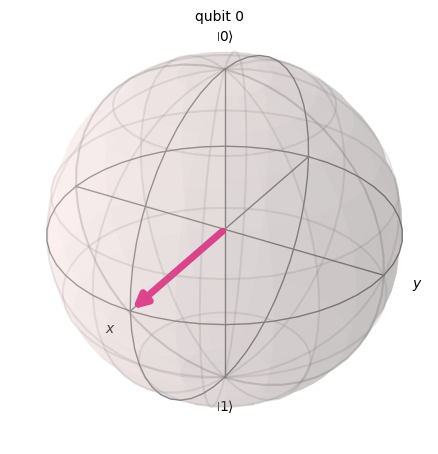


Depois de aplicar a porta Z:


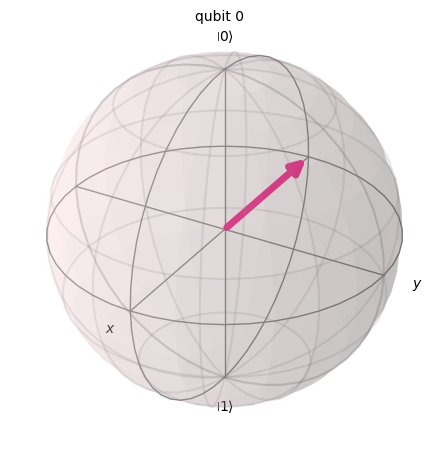


A porta Z rotacionou o estado de +X para -X (180° em torno do eixo Z)


In [40]:
# Demonstração: Aplicar porta Z em |+⟩
estado_inicial = state_plus
estado_apos_Z = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])

print("Antes de aplicar a porta Z:")
plot_bloch_multivector(estado_inicial)
plt.show()

print("\nDepois de aplicar a porta Z:")
plot_bloch_multivector(estado_apos_Z)
plt.show()

print("\nA porta Z rotacionou o estado de +X para -X (180° em torno do eixo Z)")

### Demonstração: Efeito da Porta S

A porta S adiciona uma fase de 90° ao estado |1⟩:

$$S|+⟩ = S · \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) = \frac{1}{\sqrt{2}}(|0⟩ + i|1⟩) = |i+⟩$$

Na esfera de Bloch, isso corresponde a uma rotação de 90° em torno do eixo Z.

Antes de aplicar a porta S:


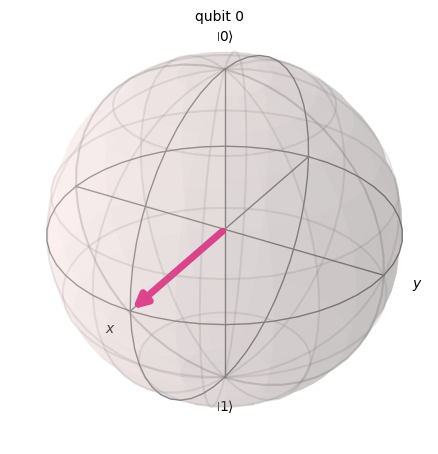


Depois de aplicar a porta S:


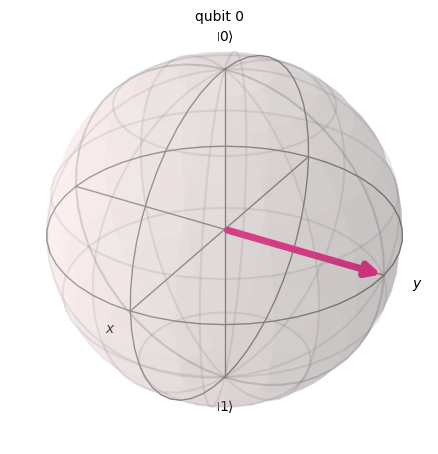


A porta S rotacionou o estado de +X para +Y (90° em torno do eixo Z)


In [41]:
# Demonstração: Aplicar porta S em |+⟩
estado_inicial = state_plus
estado_apos_S = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])

print("Antes de aplicar a porta S:")
plot_bloch_multivector(estado_inicial)
plt.show()

print("\nDepois de aplicar a porta S:")
plot_bloch_multivector(estado_apos_S)
plt.show()

print("\nA porta S rotacionou o estado de +X para +Y (90° em torno do eixo Z)")

### Visualização com Q-Sphere

O Q-Sphere é outra forma de visualizar estados quânticos, onde as **cores** representam as fases:
- **Verde/Azul claro**: Fase positiva (0° a 90°)
- **Vermelho/Laranja**: Fase negativa (180° a 270°)
- **Tamanho das esferas**: Magnitude da amplitude

Estado |+⟩ - Fase 0°:


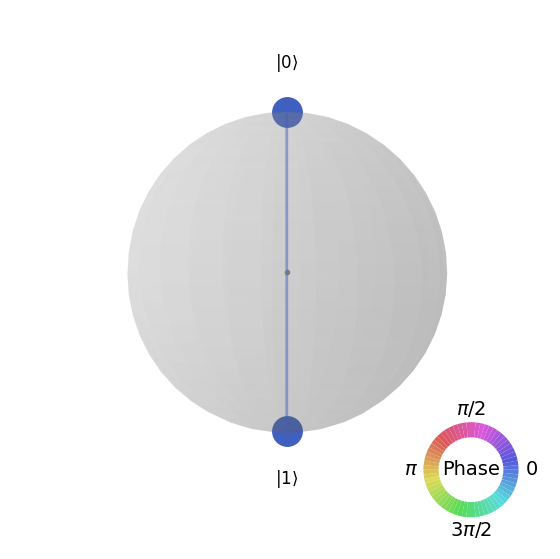


Estado |-⟩ - Fase 180°:


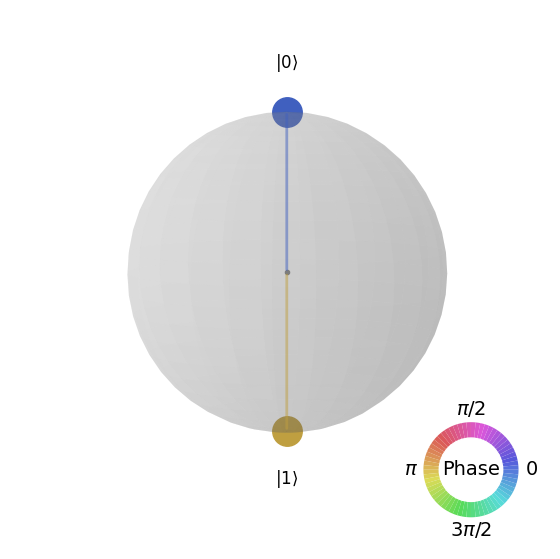


Estado |i+⟩ - Fase 90°:


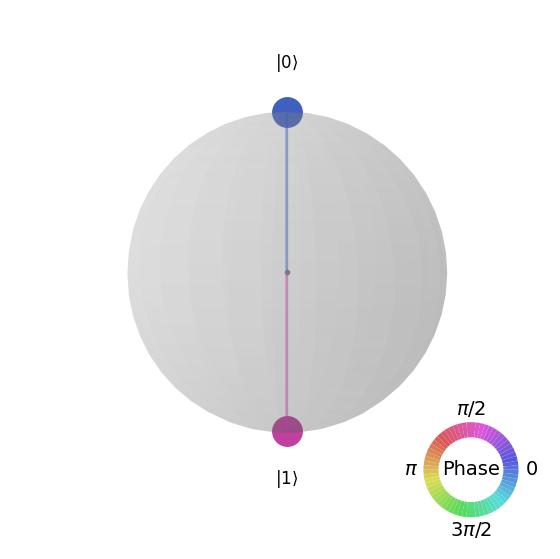


Estado |i-⟩ - Fase 270°:


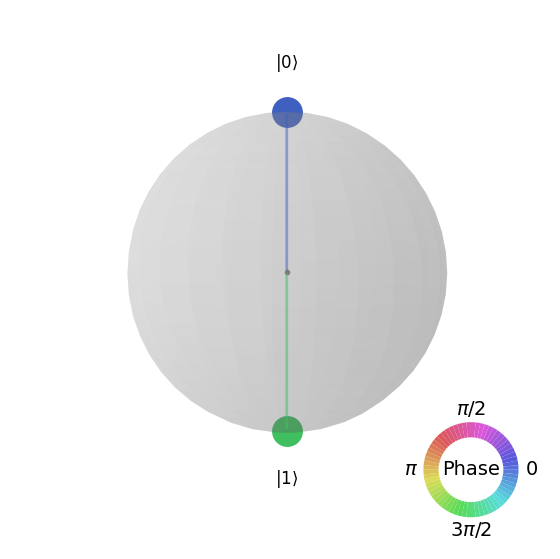


No Q-Sphere, observe a mudança de cores indicando diferentes fases.


In [42]:
# Visualizar os mesmos estados no Q-Sphere
print("Estado |+⟩ - Fase 0°:")
plot_state_qsphere(state_plus)
plt.show()

print("\nEstado |-⟩ - Fase 180°:")
plot_state_qsphere(state_minus)
plt.show()

print("\nEstado |i+⟩ - Fase 90°:")
plot_state_qsphere(state_i_plus)
plt.show()

print("\nEstado |i-⟩ - Fase 270°:")
plot_state_qsphere(state_i_minus)
plt.show()

print("\nNo Q-Sphere, observe a mudança de cores indicando diferentes fases.")

### 📊 Resumo: Por que a Fase é Importante?

| Conceito | Observável? | Importância |
|----------|-------------|-------------|
| **Fase Global** | ❌ Não | Irrelevante matematicamente |
| **Fase Relativa** | ✅ Sim (através de interferência) | Essencial para algoritmos quânticos |
| **Porta Z** | Modifica fase | Inverte fase de \|1⟩ (180°) |
| **Porta S** | Modifica fase | Adiciona 90° de fase a \|1⟩ |
| **Porta T** | Modifica fase | Adiciona 45° de fase a \|1⟩ |

A fase quântica é fundamental para:
- 🔄 **Interferência quântica**: Estados podem interferir construtivamente ou destrutivamente
- 🎯 **Algoritmos quânticos**: Grover, Shor, e outros dependem de manipulação precisa de fases
- 🔗 **Emaranhamento**: Estados emaranhados têm relações de fase específicas
- ⚡ **Phase Kickback**: Técnica usada em oráculos quânticos (veremos em notebooks avançados)

### 🧪 Experimento Interativo: Crie seu próprio estado com fase!

Modifique o ângulo θ abaixo para criar diferentes estados de superposição com fases variadas:

Estado criado: |ψ⟩ = 1/√2 (|0⟩ + e^(i·45°)|1⟩)
Componente |0⟩: (0.7071067811865475+0j)
Componente |1⟩: (0.5+0.5j)
Fase relativa: 45°

Esfera de Bloch - Fase θ = 45°:


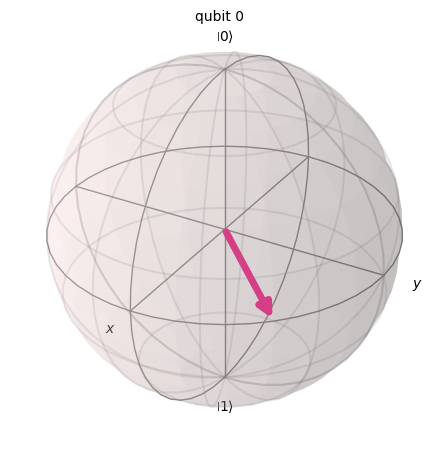


Q-Sphere - Fase θ = 45°:


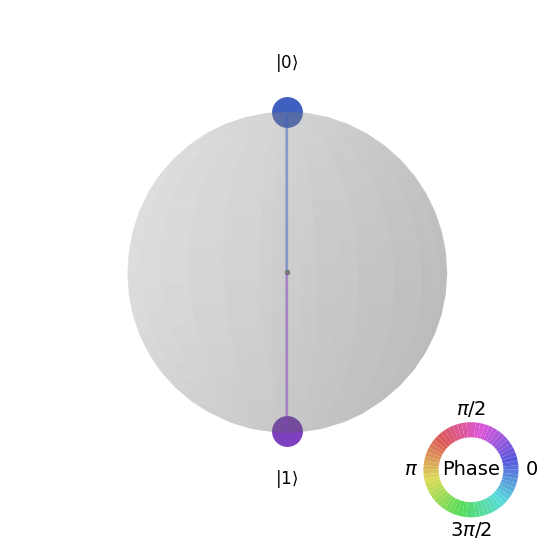

In [43]:
# Experimente diferentes valores de theta (em graus)
theta_graus = 45  # Modifique este valor: 0, 45, 90, 135, 180, 225, 270, 315...
theta_rad = np.deg2rad(theta_graus)

# Criar estado com fase customizada
estado_custom = Statevector([1/np.sqrt(2), np.exp(1j * theta_rad)/np.sqrt(2)])

# Mostrar o estado matematicamente
print(f"Estado criado: |ψ⟩ = 1/√2 (|0⟩ + e^(i·{theta_graus}°)|1⟩)")
print(f"Componente |0⟩: {estado_custom.data[0]}")
print(f"Componente |1⟩: {estado_custom.data[1]}")
print(f"Fase relativa: {theta_graus}°\n")

# Visualizar na Esfera de Bloch
print(f"Esfera de Bloch - Fase θ = {theta_graus}°:")
plot_bloch_multivector(estado_custom)
plt.show()

# Visualizar no Q-Sphere
print(f"\nQ-Sphere - Fase θ = {theta_graus}°:")
plot_state_qsphere(estado_custom)
plt.show()

### Produto interno (Inner Product) ou "bra-ket"

O produto interno entre dois estados quânticos |ψ⟩ e |φ⟩ é denotado por ⟨ψ|φ⟩ e é calculado como:

Ket é o vetor coluna que representa o estado quântico, enquanto bra é o vetor linha conjugado transposto correspondente.

> Como se calcula o vetor linha conjugado transposto?
> Para calcular o vetor linha conjugado transposto (bra) de um vetor coluna (ket), você deve seguir dois passos:
> 1. Transpor o vetor coluna, ou seja, transformar suas linhas em colunas.
> 2. Tomar o conjugado complexo de cada elemento do vetor transposto, o que significa substituir cada número complexo pelo seu conjugado (inverter o sinal da parte imaginária).

Se $|ψ⟩ = \begin{bmatrix} 𝛼 \\ 𝛽 \end{bmatrix}$ e $|φ⟩ = \begin{bmatrix} γ \\ δ \end{bmatrix}$, então:

$⟨ψ|φ⟩ = \begin{bmatrix} 𝛼 & 𝛽 \end{bmatrix} * \begin{bmatrix} γ \\ δ \end{bmatrix} = 𝛼*γ +𝛽*δ$

In [44]:
# Exemplo de produto interno

bra_0 = ket_0.T
bra_1 = ket_1.T

# ⟨0|0⟩
phi_00 = bra_0 * ket_0

# ⟨0|1⟩
phi_01 = bra_0 * ket_1

# ⟨1|0⟩
phi_10 = bra_1 * ket_0

# ⟨1|1⟩
phi_11 = bra_1 * ket_1

display(Markdown(f"$ \\langle 0 | 0 \\rangle = {sp.latex(bra_0)} * {sp.latex(ket_0)} = {phi_00[0,0]} $"))
display(Markdown(f"$ \\langle 0 | 1 \\rangle = {sp.latex(bra_0)} * {sp.latex(ket_1)} = {phi_01[0,0]} $"))
display(Markdown(f"$ \\langle 1 | 0 \\rangle = {sp.latex(bra_1)} * {sp.latex(ket_0)} = {phi_10[0,0]} $"))
display(Markdown(f"$ \\langle 1 | 1 \\rangle = {sp.latex(bra_1)} * {sp.latex(ket_1)} = {phi_11[0,0]} $"))

$ \langle 0 | 0 \rangle = \left[\begin{matrix}1 & 0\end{matrix}\right] * \left[\begin{matrix}1\\0\end{matrix}\right] = 1 $

$ \langle 0 | 1 \rangle = \left[\begin{matrix}1 & 0\end{matrix}\right] * \left[\begin{matrix}0\\1\end{matrix}\right] = 0 $

$ \langle 1 | 0 \rangle = \left[\begin{matrix}0 & 1\end{matrix}\right] * \left[\begin{matrix}1\\0\end{matrix}\right] = 0 $

$ \langle 1 | 1 \rangle = \left[\begin{matrix}0 & 1\end{matrix}\right] * \left[\begin{matrix}0\\1\end{matrix}\right] = 1 $

### Produto tensorial

O produto tensorial (ou produto de Kronecker) é uma operação matemática que combina dois estados quânticos para formar um estado composto. Se |ψ⟩ e |φ⟩ são dois estados quânticos, o produto tensorial é denotado por |ψ⟩ ⊗ |φ⟩.

Exemplo:


$$|0\rangle \otimes |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\ 0 \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

In [45]:
# Exemplo de produto tensorial

# |0⟩ ⊗ |0⟩
tensor_00 = sp.kronecker_product(ket_0, ket_0)
display(
    Markdown(
        f"$$\\ket{{0}} \\otimes \\ket{{0}} = {sp.latex(ket_0)} \\otimes {sp.latex(ket_0)} = \\begin{{bmatrix}} 1 \\cdot {sp.latex(ket_0)} \\\\ 0 \\cdot {sp.latex(ket_0)} \\end{{bmatrix}} = {sp.latex(tensor_00)} = \\ket{{00}}$$"
    )
)

# |0⟩ ⊗ |1⟩
tensor_01 = sp.kronecker_product(ket_0, ket_1)
display(
    Markdown(
        f"$$\\ket{{0}} \\otimes \\ket{{1}} = {sp.latex(ket_0)} \\otimes {sp.latex(ket_1)} = \\begin{{bmatrix}} 1 \\cdot {sp.latex(ket_1)} \\\\ 0 \\cdot {sp.latex(ket_1)} \\end{{bmatrix}} = {sp.latex(tensor_01)} = \\ket{{01}}$$"
    )
)

# |1⟩ ⊗ |0⟩
tensor_10 = sp.kronecker_product(ket_1, ket_0)
display(
    Markdown(
        f"$$\\ket{{1}} \\otimes \\ket{{0}} = {sp.latex(ket_1)} \\otimes {sp.latex(ket_0)} = \\begin{{bmatrix}} 0 \\cdot {sp.latex(ket_0)} \\\\ 1 \\cdot {sp.latex(ket_0)} \\end{{bmatrix}} = {sp.latex(tensor_10)} = \\ket{{10}}$$"
    )
)

# |1⟩ ⊗ |1⟩
tensor_11 = sp.kronecker_product(ket_1, ket_1)
display(
    Markdown(
        f"$$\\ket{{1}} \\otimes \\ket{{1}} = {sp.latex(ket_1)} \\otimes {sp.latex(ket_1)} = \\begin{{bmatrix}} 0 \\cdot {sp.latex(ket_1)} \\\\ 1 \\cdot {sp.latex(ket_1)} \\end{{bmatrix}} = {sp.latex(tensor_11)} = \\ket{{11}}$$"
    )
)

$$\ket{0} \otimes \ket{0} = \left[\begin{matrix}1\\0\end{matrix}\right] \otimes \left[\begin{matrix}1\\0\end{matrix}\right] = \begin{bmatrix} 1 \cdot \left[\begin{matrix}1\\0\end{matrix}\right] \\ 0 \cdot \left[\begin{matrix}1\\0\end{matrix}\right] \end{bmatrix} = \left[\begin{matrix}1\\0\\0\\0\end{matrix}\right] = \ket{00}$$

$$\ket{0} \otimes \ket{1} = \left[\begin{matrix}1\\0\end{matrix}\right] \otimes \left[\begin{matrix}0\\1\end{matrix}\right] = \begin{bmatrix} 1 \cdot \left[\begin{matrix}0\\1\end{matrix}\right] \\ 0 \cdot \left[\begin{matrix}0\\1\end{matrix}\right] \end{bmatrix} = \left[\begin{matrix}0\\1\\0\\0\end{matrix}\right] = \ket{01}$$

$$\ket{1} \otimes \ket{0} = \left[\begin{matrix}0\\1\end{matrix}\right] \otimes \left[\begin{matrix}1\\0\end{matrix}\right] = \begin{bmatrix} 0 \cdot \left[\begin{matrix}1\\0\end{matrix}\right] \\ 1 \cdot \left[\begin{matrix}1\\0\end{matrix}\right] \end{bmatrix} = \left[\begin{matrix}0\\0\\1\\0\end{matrix}\right] = \ket{10}$$

$$\ket{1} \otimes \ket{1} = \left[\begin{matrix}0\\1\end{matrix}\right] \otimes \left[\begin{matrix}0\\1\end{matrix}\right] = \begin{bmatrix} 0 \cdot \left[\begin{matrix}0\\1\end{matrix}\right] \\ 1 \cdot \left[\begin{matrix}0\\1\end{matrix}\right] \end{bmatrix} = \left[\begin{matrix}0\\0\\0\\1\end{matrix}\right] = \ket{11}$$

## Representação de dois qubits

- Estado |00⟩: $\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$
- Estado |01⟩: $\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$
- Estado |10⟩: $\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}$
- Estado |11⟩: $\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$

Dois qubits podem estar em superposição de todos os quatro estados possíveis:

$$|\psi\rangle = 𝛼|00\rangle + 𝛽|01\rangle + γ|10\rangle + δ|11\rangle$$
onde |𝛼|² + |𝛽|² + |γ|² + |δ|² = 1.



### Porta Controlled NOT (CNOT)

A porta CNOT (Controlled NOT) é uma porta lógica quântica que atua em dois qubits: um qubit de controle e um qubit alvo. A operação da porta CNOT é a seguinte:

- Se o qubit de controle estiver em |0⟩, o qubit alvo permanece inalterado.
- Se o qubit de controle estiver em |1⟩, o qubit alvo é invertido (0 vira 1 e 1 vira 0).

A porta CNOT é representada pela seguinte matriz:

$$\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$$

Quando aplicamos a porta CNOT a um estado composto de dois qubits, o resultado depende do estado do qubit de controle. Por exemplo, se aplicarmos a porta CNOT ao estado |10⟩ (onde o primeiro qubit é o controle e o segundo é o alvo), o resultado será |11⟩, pois o qubit de controle está em |1⟩, então o qubit alvo é invertido.

Por exemplo:

$$\text{CNOT}|11⟩ = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} * \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = |10⟩$$


In [46]:
# Implementação do uso da porta CNOT

# Definindo a porta CNOT
CNOT = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])  

# |11> 

q_11 = np.array([
    [0],
    [0],
    [0],
    [1]
])

# Aplicando a porta CNOT em |11>
novo_estado_cnot = np.dot(CNOT, q_11)
print("\n--- Após aplicar a Porta CNOT em |11> ---")
print(f"Esperamos |10>, obtivemos:\n{novo_estado_cnot}")

# Aplicando a porta CNOT em |10>
q_10 = np.array([
    [0],
    [0],
    [1],
    [0]
])

novo_estado_cnot_10 = np.dot(CNOT, q_10)
print("\n--- Após aplicar a Porta CNOT em |10> ---")
print(f"Esperamos |11>, obtivemos:\n{novo_estado_cnot_10}")






--- Após aplicar a Porta CNOT em |11> ---
Esperamos |10>, obtivemos:
[[0]
 [0]
 [1]
 [0]]

--- Após aplicar a Porta CNOT em |10> ---
Esperamos |11>, obtivemos:
[[0]
 [0]
 [0]
 [1]]


## O Colapso (Probabilidade)
 
Ao final, calculamos o quadrado desses números (0.707² ≈ 0.5). Isso diz ao computador: "Jogue uma moeda. Tem 50% de chance de dar Cara (0) e 50% de dar Coroa (1)". É aqui que a computação quântica deixa de ser determinística (como a clássica) e passa a ser probabilística.

In [47]:

# A Medição (O Colapso)
# Na teoria: A probabilidade de medir 0 ou 1 é o quadrado da amplitude (módulo ao quadrado).

def medir_qubit(estado_vetor):
    # Extrair amplitudes (alpha e beta)
    alpha = estado_vetor[0][0]
    beta = estado_vetor[1][0]
    
    # Calcular probabilidades (Born Rule): |amplitude|^2
    prob_0 = abs(alpha) ** 2
    prob_1 = abs(beta) ** 2
    
    print(f"\nProbabilidade calculada de ser 0: {prob_0:.2f}")
    print(f"Probabilidade calculada de ser 1: {prob_1:.2f}")
    
    # Simular o "lance de dados" da natureza
    resultado = np.random.choice([0, 1], p=[prob_0, prob_1])
    return resultado

# Vamos medir nosso estado de superposição
leitura = medir_qubit(estado_superposicao)
print(f"Resultado da Medição (Colapso): |{leitura}>")


Probabilidade calculada de ser 0: 0.50
Probabilidade calculada de ser 1: 0.50
Resultado da Medição (Colapso): |1>


Por que não usar apenas NumPy sempre? Se é tão simples, por que precisamos do Qiskit ou PennyLane?

Porque as matrizes crescem exponencialmente.

- 1 Qubit = Matriz $2 \times 2$
- 2 Qubits = Matriz $4 \times 4$
- 3 Qubits = Matriz $8 \times 8$
- ...
- 50 Qubits = Matriz $1.125.899.906.842.624 \times 1.125.899.906.842.624$
  
O seu computador não tem memória RAM suficiente para armazenar a matriz de 50 qubits usando NumPy. Os frameworks como Qiskit usam truques matemáticos e otimizações (ou enviam para computadores reais) para lidar com essa complexidade.